# Test №1

In [39]:
import pandas as pd
import numpy as np

In [40]:
illit = pd.read_csv('illiteracy.txt', sep = '\t')[['Illit', 'Births']]

In [41]:
illit.head()

,Illit,Births
0,20.5,1.78
1,39.1,2.44
2,15.0,2.34
3,5.9,2.97
4,73.5,5.60


In [42]:
illit.corr(method='pearson')

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [43]:
illit.corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


# Test №2

In [44]:
water = pd.read_csv('water.txt', sep = '\t')

In [45]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [46]:
water.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [47]:
round(-0.654849, 4)

-0.6548

In [48]:
water.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [49]:
round(-0.631665,4)

-0.6317

In [50]:
water_south = water[water.location == 'South']
water_north = water[water.location == 'North']

In [51]:
water_south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [52]:
water_north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [53]:
round(-0.368598,4)

-0.3686

Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

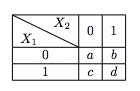

In [54]:
d = {'man': [515, 239], 'woman': [718, 203]}
df = pd.DataFrame(data=d)
df

,man,woman
0,515,718
1,239,203


In [55]:
a = df.iloc[0, 0]
b = df.iloc[0, 1]
c = df.iloc[1, 0]
d = df.iloc[1, 1]
MCC = (a*d - b*c) / np.sqrt((a + b)*(a + c)*(b + d)*(c + d))
round(MCC, 3)

-0.109

In [56]:
from scipy.stats import chi2_contingency
import scipy

In [57]:
chi2_contingency(df)

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[555.03402985, 677.96597015],
        [198.96597015, 243.03402985]]))

In [58]:
'''Пример из конспекта'''
d1 = {'0': [48, 92], '1': [30, 36]}
df1 = pd.DataFrame(data=d1)
chi2_contingency(df1)

(1.9271792226870357,
 0.16506738276246485,
 1,
 array([[53.00970874, 24.99029126],
        [86.99029126, 41.00970874]]))

Смотри C4W2 stat.two_proportions_diff_test.ipynb

In [59]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [60]:
man = [0]*515 + [1]*239
woman = [0]*718 + [1]*203

In [61]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(man, woman))

95% confidence interval for a difference between proportions: [0.053905, 0.139222]


In [62]:
round(0.053905, 4)

0.0539

In [63]:
proportions_diff_z_test(proportions_diff_z_stat_ind(man, woman))

8.153453089576601e-06

In [64]:
# def proportions_diff_confint_ind(d1, d2, alpha = 0.05):    
#     z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
#     p1 = d1[0] / (d1[0] + d1[1])
#     p2 = d2[1] / (d2[0] + d2[1])
    
#     left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ (d1[0] + d1[1]) + p2 * (1 - p2)/ (d2[0] + d2[1]))
#     right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ (d1[0] + d1[1]) + p2 * (1 - p2)/ (d2[0] + d2[1]))
    
#     return (left_boundary, right_boundary)

# def proportions_diff_z_stat_ind(d1, d2):
#     n1 = (d1[0] + d1[1])
#     n2 = (d2[0] + d2[1])
    
#     p1 = d1[0] / (d1[0] + d1[1])
#     p2 = d2[1] / (d2[0] + d2[1])
#     P = float(p1*n1 + p2*n2) / (n1 + n2)
    
#     return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

# def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
#     if alternative not in ('two-sided', 'less', 'greater'):
#         raise ValueError("alternative not recognized\n"
#                          "should be 'two-sided', 'less' or 'greater'")
    
#     if alternative == 'two-sided':
#         return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
#     if alternative == 'less':
#         return scipy.stats.norm.cdf(z_stat)

#     if alternative == 'greater':
#         return 1 - scipy.stats.norm.cdf(z_stat)

In [65]:
data_of_happiness_ = [[197, 111, 33],
                      [382, 685, 331],
                      [110, 342, 333]]
data_of_happiness = pd.DataFrame(data_of_happiness_)

In [66]:
chi2_contingency(data_of_happiness)

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

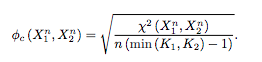

In [67]:
fi = np.sqrt(chi2_contingency(data_of_happiness)[0] / 
             (data_of_happiness.sum().sum() * (3 - 1)))
round(fi, 4)

0.2412

# Test №3

In [68]:
import scipy.stats as sts

Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора. Данные записаны в файле.

Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. Выберите два классификатора, различие между которыми наиболее статистически значимо.

In [69]:
AUCs = pd.read_csv('AUCs.txt', sep='\t', header=0)

In [70]:
AUCs.head()

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898


In [72]:
from itertools import combinations

In [80]:
sts.wilcoxon((np.reshape(AUCs[['C4.5']].values, (1, AUCs[['C4.5']].shape[0]))[0] - 
              np.reshape(AUCs[['C4.5+m']].values,(1, AUCs[['C4.5+m']].shape[0]))[0]))

WilcoxonResult(statistic=6.5, pvalue=0.01075713311978963)

In [ ]:
[(0.599, 0.591), (0.599, 0.59), (0.599, 0.569), (0.591, 0.59), (0.591, 0.569), (0.59, 0.569)]

In [78]:
np.reshape(AUCs[['C4.5']].values, (1, AUCs[['C4.5']].shape[0]))[0]

array([0.763, 0.599, 0.954, 0.628, 0.882, 0.936, 0.661, 0.583, 0.775,
       1.   , 0.94 , 0.619, 0.972, 0.957])

In [147]:
p_value = []
for a, b in list(combinations([np.reshape(AUCs[['C4.5']].values, (1, AUCs[['C4.5']].shape[0]))[0],
                               np.reshape(AUCs[['C4.5+m']].values,(1, AUCs[['C4.5+m']].shape[0]))[0],
                               np.reshape(AUCs[['C4.5+cf']].values, (1, AUCs[['C4.5+cf']].shape[0]))[0],
                               np.reshape(AUCs[['C4.5+m+cf']].values, (1, AUCs[['C4.5+m+cf']].shape[0]))[0]], 2)):
    print(sts.wilcoxon((a - b)))
    p_value.append(sts.wilcoxon((a - b))[1])
    print(a[0])
    print(b[0])

WilcoxonResult(statistic=6.5, pvalue=0.01075713311978963)
0.763
0.768
WilcoxonResult(statistic=43.0, pvalue=0.861262330095348)
0.763
0.7709999999999999
WilcoxonResult(statistic=11.0, pvalue=0.015906444101703374)
0.763
0.7979999999999999
WilcoxonResult(statistic=17.0, pvalue=0.046332729793395394)
0.768
0.7709999999999999
WilcoxonResult(statistic=22.0, pvalue=0.3278256758446406)
0.768
0.7979999999999999
WilcoxonResult(statistic=10.0, pvalue=0.022909099354356588)
0.7709999999999999
0.7979999999999999


In [148]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [149]:
data = pd.DataFrame({'1': [], '2': []})
i = 0
for a, b in list(combinations(['C4.5', 'C4.5+m', 'C4.5+cf', 'C4.5+m+cf'], 2)):
    data.loc[i] = [a,b]
    i += 1
data['p_value'] = p_value
data

,1,2,p_value
0,C4.5,C4.5+m,0.010757
1,C4.5,C4.5+cf,0.861262
2,C4.5,C4.5+m+cf,0.015906
3,C4.5+m,C4.5+cf,0.046333
4,C4.5+m,C4.5+m+cf,0.327826
5,C4.5+cf,C4.5+m+cf,0.022909


In [137]:
reject, p_corrected, a1, a2 = multipletests(data.p_value, 
                                            alpha = 0.05, 
                                            method = 'holm')
data['p_corrected'] = p_corrected
data['reject'] = reject
data

,1,2,p_value,p_corrected,reject
0,C4.5,C4.5+m,0.010757,0.064543,False
1,C4.5,C4.5+cf,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,0.015906,0.079532,False
3,C4.5+m,C4.5+cf,0.046333,0.138998,False
4,C4.5+m,C4.5+m+cf,0.327826,0.655651,False
5,C4.5+cf,C4.5+m+cf,0.022909,0.091636,False


In [138]:
reject, p_corrected, a1, a2 = multipletests(data.p_value, 
                                            alpha = 0.05, 
                                            method = 'fdr_bh')
data['p_corrected'] = p_corrected
data['reject'] = reject
data

,1,2,p_value,p_corrected,reject
0,C4.5,C4.5+m,0.010757,0.045818,True
1,C4.5,C4.5+cf,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,0.015906,0.045818,True
3,C4.5+m,C4.5+cf,0.046333,0.069499,False
4,C4.5+m,C4.5+m+cf,0.327826,0.393391,False
5,C4.5+cf,C4.5+m+cf,0.022909,0.045818,True


# Test №4

In [1]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_table('botswana.tsv', sep='\t')
data.head(16)

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
5,1,30,5,spirit,5.0,1.0,0.0,1,24.0,7.0,1,1.0,0.0,0.0,0.0
6,3,42,4,other,3.0,1.0,0.0,1,15.0,11.0,1,1.0,0.0,1.0,0.0
7,1,36,7,other,4.0,1.0,1.0,1,24.0,9.0,1,1.0,0.0,0.0,0.0
8,4,37,16,catholic,4.0,1.0,1.0,1,26.0,17.0,1,1.0,1.0,1.0,1.0
9,1,34,5,protestant,4.0,1.0,1.0,1,18.0,3.0,1,0.0,1.0,0.0,0.0


Давайте проанализируем данные опроса 4361 женщин из Ботсваны. О каждой из них мы знаем:
* сколько детей она родила (признак ceb)
* возраст (age)
* длительность получения образования (educ)
* религиозная принадлежность (religion)
* идеальное, по её мнению, количество детей в семье (idlnchld)
* была ли она когда-нибудь замужем (evermarr)
* возраст первого замужества (agefm)
* длительность получения образования мужем (heduc)
* знает ли она о методах контрацепции (knowmeth)
* использует ли она методы контрацепции (usemeth)
* живёт ли она в городе (urban)
* есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle)

In [19]:
# a = data['religion'].values
# a.sort()
# last = ' '
# counter = 0
# for i in a:
#     if last != i:
#         counter += 1
#         last = i
# counter

In [20]:
data.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,2079.000000,1956.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,0.476726,20.686388,5.144683,0.516625,0.140202,0.701766,0.092911,0.275815
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,0.499515,5.002383,4.803028,0.499781,0.347236,0.457535,0.290341,0.446975
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,1.000000,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data.dropna().shape

(1834, 15)

In [22]:
index_of_nan_agefm = data[data['agefm'].isna() == True].index
data['nevermarr'] = [1 if i in index_of_nan_agefm else 0 for i in range(data.shape[0])]

In [23]:
data = data.drop(columns=['evermarr'])
data['agefm'].fillna(0,inplace=True)

In [24]:
arr = data['heduc'].values
cond = data['nevermarr'].values
for i, a in enumerate(arr):
    if cond[i] == 1:
        arr[i] = -1
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [25]:
data.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,4238.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000,4361.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,9.861729,1.836008,0.516625,0.140202,0.701766,0.092911,0.275815,0.523274
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,10.894991,4.475487,0.499781,0.347236,0.457535,0.290341,0.446975,0.499515
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,19.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
4361 - 4238

123

In [27]:
data['idlnchld_noans'] = [1 if i in (data[data['idlnchld'].isna() == True].index) else 0 for i in range(data.shape[0])]
data['heduc_noans']    = [1 if i in (data[data['heduc'].isna() == True].index) else 0 for i in range(data.shape[0])]
data['usemeth_noans']  = [1 if i in (data[data['usemeth'].isna() == True].index) else 0 for i in range(data.shape[0])]

data['idlnchld'].fillna(-1 ,inplace=True)
data['heduc'].fillna(-2,inplace=True)
data['usemeth'].fillna(-1,inplace=True)

In [28]:
data.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
count,4361.000000,4361.000000,4361.000000,4361.000000,4354.000000,4361.000000,4361.000000,4361.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,2.441642,27.405182,5.855996,4.461362,0.963252,0.551938,9.861729,1.727815,0.516625,0.140202,0.701766,0.092911,0.275815,0.523274,0.027517,0.028205,0.016281
std,2.406861,8.685233,3.927075,2.373581,0.188164,0.529082,10.894991,4.457390,0.499781,0.347236,0.457535,0.290341,0.446975,0.499515,0.163602,0.165576,0.126567
min,0.000000,15.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,19.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data.dropna(inplace=True)

In [30]:
data.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,2.437443,27.393514,5.863155,4.466191,0.963431,0.553818,9.850736,1.730451,0.517249,0.140064,0.701702,0.092916,0.275299,0.523919,0.027139,0.028059,0.015179
std,2.401785,8.675630,3.922694,2.372879,0.187722,0.526808,10.897246,4.459982,0.499760,0.347094,0.457564,0.290348,0.446716,0.499485,0.162507,0.165160,0.122280
min,0.000000,15.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,19.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
data.size

78264

In [32]:
data

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0,0,0,0


In [33]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import scipy as sc
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
# pip install -U patsy

In [35]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:42:15   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

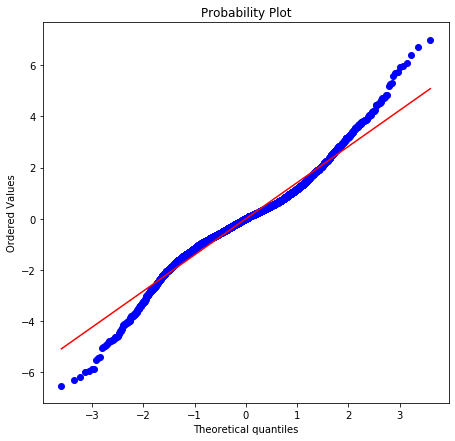

In [36]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

In [37]:
print('Breusch-Pagan test: p =', sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p = 1.1452927633439797e-225


In [38]:
fitted = m1.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:42:16   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [39]:
print('Breusch-Pagan test: p =', sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p = 1.1452927633439797e-225



Удаляем признаки religion, radio и tv

In [58]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=data.drop(columns=['religion', 'radio', 'tv']))
fitted = m2.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:59:07   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [59]:
print('Breusch-Pagan test: p =', sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p = 1.1197458896534061e-228


In [60]:
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:59:08   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [61]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [62]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=data)
fitted = m3.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:59:09   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [67]:
print("F=%f, p=%e, k1=%f" %m2.fit().compare_f_test(m3.fit()))

F=92.890582, p=3.155201e-40, k1=2.000000


In [64]:
print('Breusch-Pagan test: p =', sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p = 2.4856362297517398e-219


In [65]:
fitted = m3.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:59:14   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.